##### This project involves analyzing the healthcare data to gain insights into several key areas, including patient outcomes, treatment effectiveness, disease patterns, and healthcare costs. We will first clean the raw data, then perform exploratory data analysis to identify trends and visualize the results. Note that the data is synthetic and was generated using python's Faker package. 

In [1]:
# Import libraries 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import re

In [2]:
# Read the csv file
data_df = pd.read_csv('dataset/healthcare_dataset.csv')
data_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [111]:
# check total duplicated items
data_df.duplicated().sum()

np.int64(534)

In [114]:
# Remove duplicated items 
data_df = data_df.drop_duplicates()

In [160]:
# Check for null entries
data_df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Age Group             0
Season                0
Stay Length           0
dtype: int64

In [115]:
# Get the summary of the DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [117]:
# Removing any leading and trailing whitespaces and changing to title case

# List of columns in the dataframe
columns = [
    'Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'
]

# Apply strip and title for all columns
for col in columns:
    data_df[col] = data_df[col].str.strip().str.title()

# Remove the ',' symbol in the 'Hospital' column
data_df['Hospital'] = data_df['Hospital'].str.rstrip(',').str.strip().str.title()


In [118]:
# Change the date column from strings to datetime
data_df['Date of Admission'] = pd.to_datetime(data_df['Date of Admission'])
data_df['Discharge Date'] = pd.to_datetime(data_df['Discharge Date'])

In [119]:
# There are invalid word 'And' in some hospital names that should be removed
word_to_remove = "And"

pattern = r"^\s*" + re.escape(word_to_remove) + r"\b|\b" + re.escape(word_to_remove) + r"\s*$"

data_df['Hospital'] = data_df['Hospital'].str.replace(pattern, '', regex=True, case=False)
data_df['Hospital'] = data_df['Hospital'].str.strip().str.replace('And', 'and') 

In [120]:
# Check if there are any duplicates
print(data_df['Blood Type'].unique())
print(data_df['Medical Condition'].unique())
print(data_df['Admission Type'].unique())
print(data_df['Medication'].unique())
print(data_df['Test Results'].unique())

['B-' 'A+' 'A-' 'O+' 'Ab+' 'Ab-' 'B+' 'O-']
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
['Urgent' 'Emergency' 'Elective']
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
['Normal' 'Inconclusive' 'Abnormal']


In [167]:
# Check for negative values in billing amount column 
data_df.loc[data_df['Billing Amount'] < 0 , 'Billing Amount'].count()

np.int64(0)

In [168]:
# Change all negative values to positve 
data_df['Billing Amount'] = data_df['Billing Amount'].abs()

# Exploratory Data Analysis

### 1. Patient Demographics and Patterns

#### A. Age distribution

##### Let's begin by identifying which age groups are most frequently admitted and for what conditions. 

In [166]:
# Grouping ages into bins 

bins = [10, 20, 40, 60, 80, 90]
labels = ['10-19', '20-39', '40-59', '60-79', '80-89']

data_df['Age Group'] = pd.cut(data_df['Age'], bins=bins, labels=labels, right=False)

# Calculate frequencies
age_counts = data_df['Age Group'].value_counts(sort=False).reset_index()
age_counts.columns = ['Age Group', 'Frequency']
age_counts

,Age Group,Frequency
0,10-19,1677
1,20-39,16033
2,40-59,16308
3,60-79,16098
4,80-89,4850


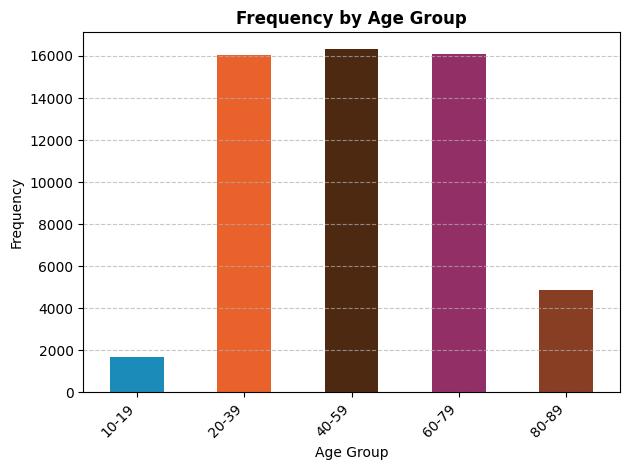

In [122]:
COLORS = ['#1b8bb9', '#e9622b', '#4d2911','#932F67','#873e23', '#8ABB6C']

age_counts.plot.bar(x='Age Group', y='Frequency', legend=False, color=COLORS)
plt.title('Frequency by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### The age group 40-59 is the most admitted, followed by 60-69, then 20-39. The groups 80-89 and 10-19 have the lowest admission rates.

In [123]:
# Conditions most frequent by age group

condition_counts = data_df.groupby(['Age Group', 'Medical Condition'], observed=True).size().unstack(fill_value=0)
condition_counts

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Age Group,,,,,,
10-19,296,276,282,270,277,276
20-39,2686,2669,2689,2657,2644,2688
40-59,2753,2640,2665,2761,2714,2775
60-79,2659,2686,2683,2749,2709,2612
80-89,824,824,821,779,807,795


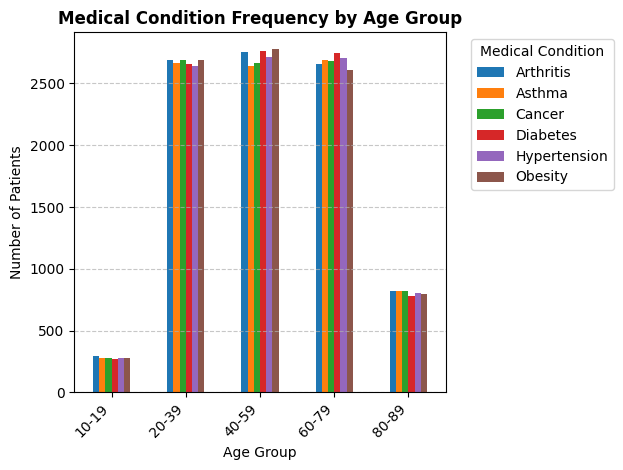

In [124]:
condition_counts.plot.bar(stacked=False)
plt.title('Medical Condition Frequency by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Obesity seems to affect most people in the ages between 40-49, followed by diabetes, and then athritis. 

#### B. Gender-based Health Trends

##### Next, we want to compare the admission rates, conditions, and outcomes between male and female patients. 

In [125]:
# Compare admission rates

gender_adm_rates = data_df['Gender'].value_counts().reset_index()
gender_adm_rates.columns = ['Gender', 'Adm Rates']
gender_adm_rates

,Gender,Adm Rates
0,Male,27496
1,Female,27470


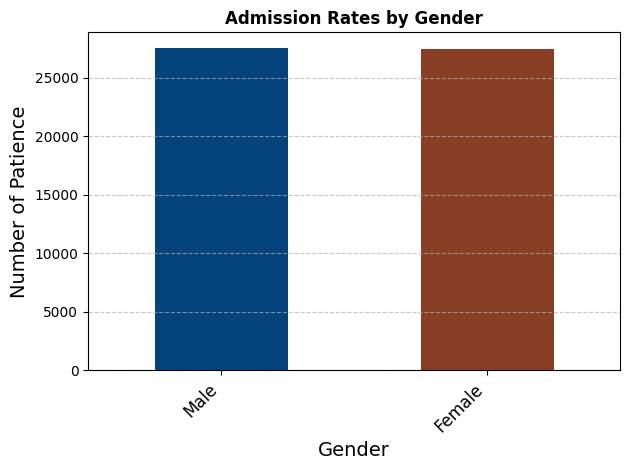

In [126]:
COL = ['#05437c','#873e23']
gender_adm_rates.plot.bar(x='Gender', y='Adm Rates', legend=False, color=COL)
plt.title('Admission Rates by Gender', fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Patience', fontsize=14)
plt.ylim(bottom=0)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The rates of admission between males and females are nearly the same, with slightly more men being admitted than women.

In [127]:
# Medical condition trends by gender

gender_condition_rates = data_df.groupby(['Gender', 'Medical Condition'], observed=True).size().unstack(fill_value=0)
gender_condition_rates

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,4642,4511,4566,4609,4569,4573
Male,4576,4584,4574,4607,4582,4573


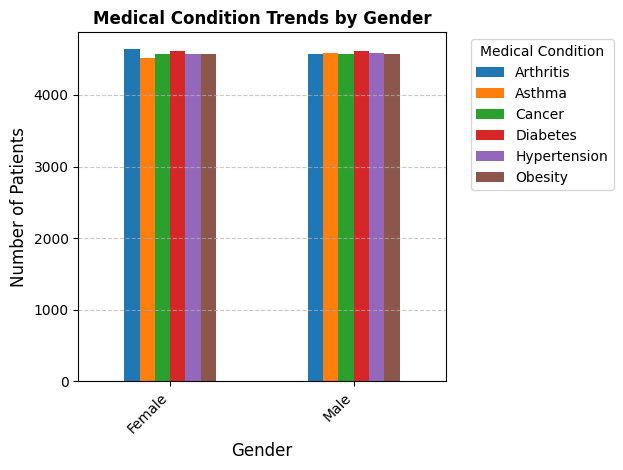

In [128]:
gender_condition_rates.plot.bar(stacked=False)
plt.title('Medical Condition Trends by Gender', fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Arthritis affects more women than men and is the most common among both genders. 

In [130]:
# Medical outcomes by gender

health_outcomes_gender = data_df.groupby(['Gender', 'Test Results']).size().unstack(fill_value=0)
health_outcomes_gender

Test Results,Abnormal,Inconclusive,Normal
Gender,,,
Female,9247,9143,9080
Male,9190,9055,9251


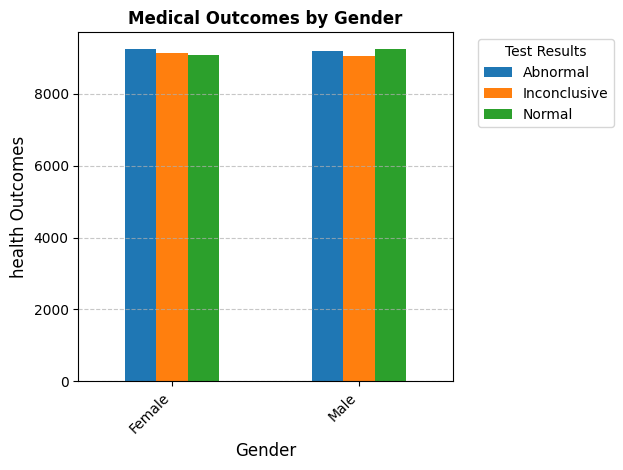

In [132]:
health_outcomes_gender.plot.bar(stacked=False)
plt.title('Medical Outcomes by Gender', fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('health Outcomes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Women tend to have more 'abnormal' test results, while men tend to have more 'normal' test results, although the overall test results are nearly the same between genders.

#### C. Blood Type Correlations

##### Lastly on this section, let's explore if certain blood types are associated with specific medical conditions

In [133]:
# Correlation between blood type and medical condition

blood_type_and_condition = data_df.groupby(['Blood Type', 'Medical Condition'], observed=True).size().unstack(fill_value=0)
blood_type_and_condition

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Blood Type,,,,,,
A+,1107,1124,1171,1201,1123,1170
A-,1144,1162,1124,1154,1186,1128
Ab+,1124,1173,1100,1165,1204,1116
Ab-,1179,1123,1186,1132,1108,1146
B+,1191,1104,1186,1180,1087,1137
B-,1152,1108,1131,1136,1163,1182
O+,1186,1162,1098,1142,1145,1122
O-,1135,1139,1144,1106,1135,1145


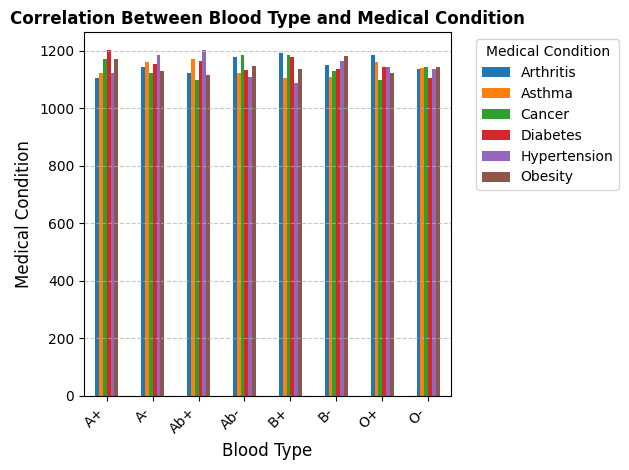

In [135]:
blood_type_and_condition.plot.bar(stacked=False)
plt.title('Correlation Between Blood Type and Medical Condition', fontweight='bold')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Medical Condition', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Patients with blood type AB+ have the highest cases of hypertension, while those with A+ have the highest cases of arthritis.

### 2.	Medical Condition Analytics

##### Here, we want to determine disease prevalence by ranking the most common medical condition.

In [136]:
# Medical condition prevalence

disease_prevalence = data_df['Medical Condition'].value_counts(sort=True).reset_index() 
disease_prevalence.columns = ['Medical Condition', 'Prevalence']
disease_prevalence

,Medical Condition,Prevalence
0,Arthritis,9218
1,Diabetes,9216
2,Hypertension,9151
3,Obesity,9146
4,Cancer,9140
5,Asthma,9095


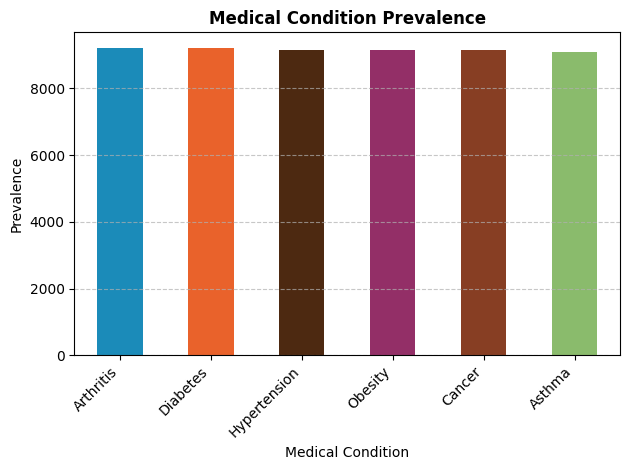

In [137]:
disease_prevalence.plot.bar(x='Medical Condition', y='Prevalence', legend=False, color=COLORS)
plt.title('Medical Condition Prevalence', fontweight='bold')
plt.xlabel('Medical Condition')
plt.ylabel('Prevalence')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The prevalence of medical condition is almost the same, but arthritis is more prevalent and asthma the least prevalent.

##### Next, let's analyze admission dates to identify if certain conditions peak during specific times of year.

In [138]:
# Assign seasons based on the month of admission

months = data_df['Date of Admission'].dt.month
shifted_months = months % 12 # Shift December to 0 instead of 12 (mod 12) to get a continuous numeric range for binning
month_bins = [0, 3, 6, 9, 12]
season_labels = ['Winter', 'Spring', 'Summer', 'Autumn']

data_df['Season'] = pd.cut(shifted_months, bins=month_bins, labels=season_labels, right=False)
data_df[['Date of Admission', 'Season']].head()

,Date of Admission,Season
0,2024-01-31,Winter
1,2019-08-20,Summer
2,2022-09-22,Autumn
3,2020-11-18,Autumn
4,2022-09-19,Autumn


In [139]:
# Seasonal patterns for medical conditions
condition_season_pattern = data_df.groupby(['Medical Condition', 'Season'], observed=True).size().unstack(fill_value=0)
condition_season_pattern

Season,Winter,Spring,Summer,Autumn
Medical Condition,,,,
Arthritis,2332,2226,2416,2244
Asthma,2272,2238,2398,2187
Cancer,2173,2314,2341,2312
Diabetes,2220,2274,2397,2325
Hypertension,2239,2295,2337,2280
Obesity,2246,2308,2311,2281


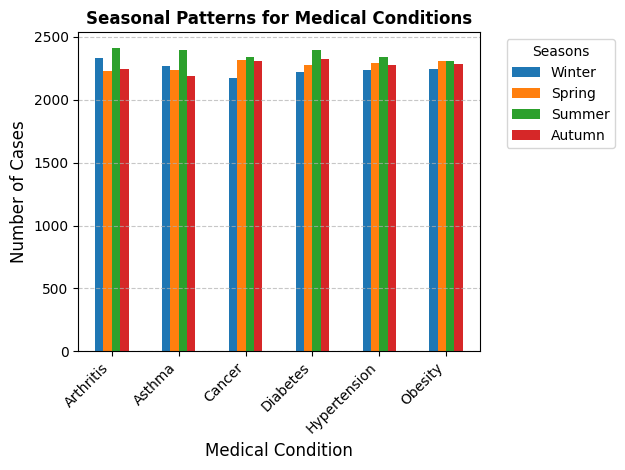

In [140]:
condition_season_pattern.plot.bar(stacked=False)
plt.title('Seasonal Patterns for Medical Conditions', fontweight='bold')
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Seasons', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Most medical conditions peak during summer. 

##### Lastly, let's see treatment effectiveness by comparing medication types with test results to assess treatment success.

In [141]:
# Treatment effectiveness
treatement_effectiveness =  data_df.groupby(['Medication','Test Results'], observed=True).size().unstack(fill_value=0)
treatement_effectiveness

Test Results,Abnormal,Inconclusive,Normal
Medication,,,
Aspirin,3700,3588,3696
Ibuprofen,3711,3613,3699
Lipitor,3670,3720,3648
Paracetamol,3695,3646,3624
Penicillin,3661,3631,3664


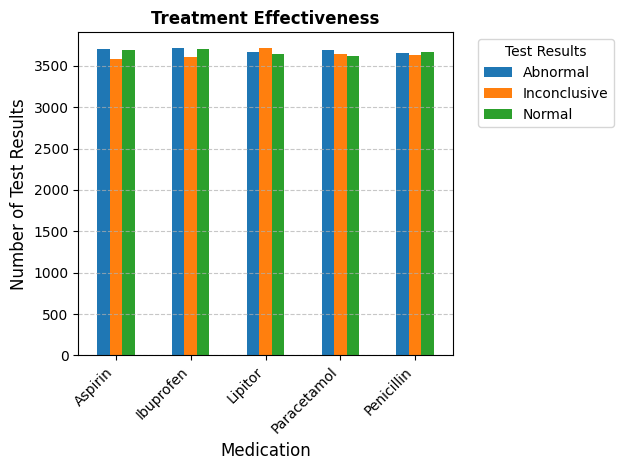

In [142]:
treatement_effectiveness.plot.bar(stacked=False)
plt.title('Treatment Effectiveness', fontweight='bold')
plt.xlabel('Medication', fontsize=12)
plt.ylabel('Number of Test Results', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Treatment effectiveness for all medications are almost the same. 

### 3. Hospital Operations and Efficiency

#### A. Admission Type Tatterns

##### Let's see the admission type patterns by analyzing the ratio of emergency vs elective vs urgent admissions. 

In [143]:
# Calculate the ratio of each admission type

admission_type_ratio = data_df['Admission Type'].value_counts(normalize=True).reset_index()
admission_type_ratio.columns = ['Admission Type', 'Ratio']
admission_type_ratio

,Admission Type,Ratio
0,Elective,0.336080
1,Urgent,0.334589
2,Emergency,0.329331


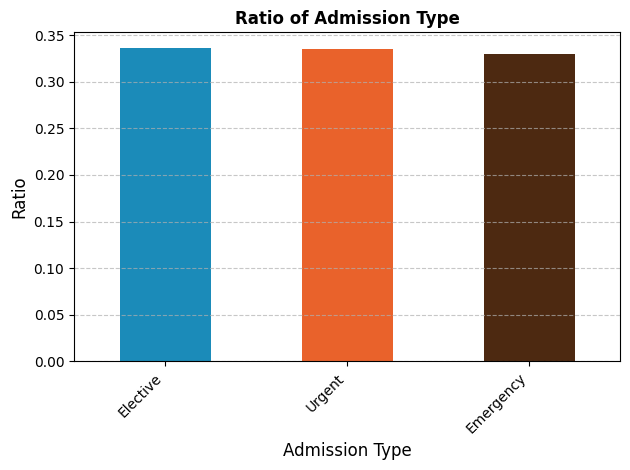

In [144]:
admission_type_ratio.plot.bar(x='Admission Type', y='Ratio', legend=False, color=COLORS)
plt.title('Ratio of Admission Type', fontweight='bold')
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The ratio of all types of admission are almost the same, with elective having slightly higher admission, then urgent, and lastly emergency.

#### B. Length of Stay Analysis

In [145]:
# Calculate average stay duration by condition

data_df['Stay Length'] = (data_df['Discharge Date'] - data_df['Date of Admission']).dt.days
average_stay_condition = data_df.groupby('Medical Condition')['Stay Length'].mean().reset_index()
average_stay_condition.columns = ['Medical Condition', 'Average Stay (Days)']
average_stay_condition

,Medical Condition,Average Stay (Days)
0,Arthritis,15.504231
1,Asthma,15.677295
2,Cancer,15.501204
3,Diabetes,15.430664
4,Hypertension,15.436236
5,Obesity,15.447627


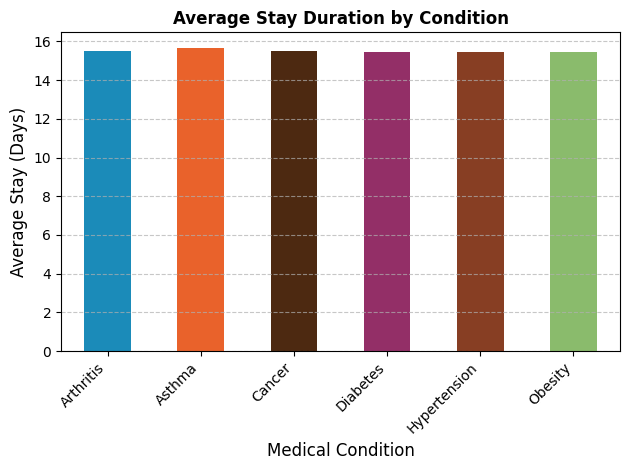

In [146]:
average_stay_condition.plot.bar(x='Medical Condition', y='Average Stay (Days)', legend=False, color=COLORS)
plt.title('Average Stay Duration by Condition', fontweight='bold')
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Average Stay (Days)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The average stay in days of all medical conditions is equal.

In [147]:
# Average stay duration by age group

average_stay_age = data_df.groupby('Age Group', observed=True)['Stay Length'].mean().reset_index()
average_stay_age.columns = ['Age Group', 'Average Stay (Days)']
average_stay_age

,Age Group,Average Stay (Days)
0,10-19,15.447227
1,20-39,15.375226
2,40-59,15.527532
3,60-79,15.619083
4,80-89,15.434845


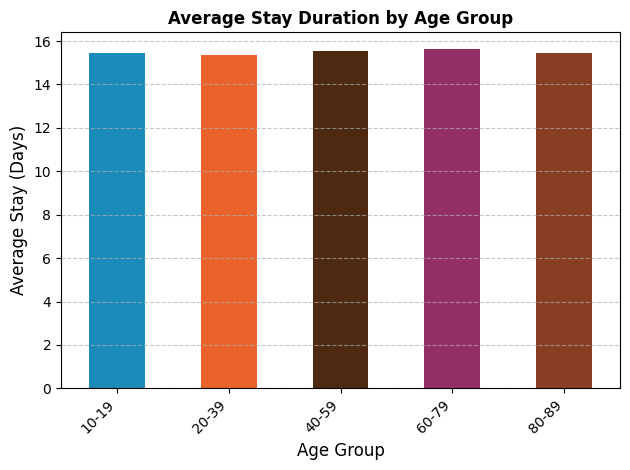

In [148]:
average_stay_age.plot.bar(x='Age Group', y='Average Stay (Days)', legend=False, color=COLORS)
plt.title('Average Stay Duration by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Stay (Days)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The average stay in days of all age groups is equal.

#### C. Doctor workload distribution

In [149]:
# Calculate the number of patients each doctor has attended to

patient_volume_per_doctor = data_df.groupby('Doctor')['Name'].count().reset_index()
patient_volume_per_doctor.columns = ['Doctor', 'Patient Volume']
top10_doctors = patient_volume_per_doctor.sort_values(by='Patient Volume', ascending=False).head(10) # Sort doctors by patient volume in descending order and limit to top 10
top10_doctors

,Doctor,Patient Volume
27856,Michael Smith,27
18989,John Smith,22
32819,Robert Smith,21
27637,Michael Johnson,20
15951,James Smith,20
10153,David Smith,19
32669,Robert Johnson,19
27920,Michael Williams,18
26612,Matthew Smith,17
18818,John Johnson,17


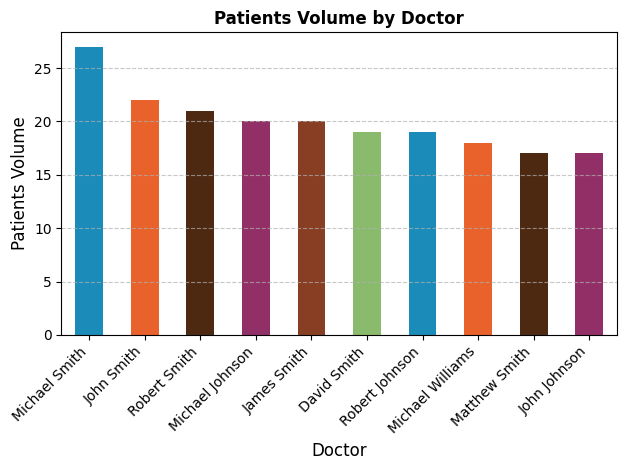

In [150]:
top10_doctors.plot.bar(x='Doctor', y='Patient Volume', legend=False, color=COLORS)
plt.title('Patients Volume by Doctor', fontweight='bold')
plt.xlabel('Doctor', fontsize=12)
plt.ylabel('Patients Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Financial Analysis

#### A. Cost variation by condition

In [169]:
# Compare billing amounts across different medical conditions

billing_by_condition = data_df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
billing_by_condition.columns = ['Medical Condition', 'Average Billing Amount']
billing_by_condition


,Medical Condition,Average Billing Amount
0,Arthritis,25513.051895
1,Asthma,25635.639969
2,Cancer,25154.730597
3,Diabetes,25662.147109
4,Hypertension,25504.906200
5,Obesity,25806.628413


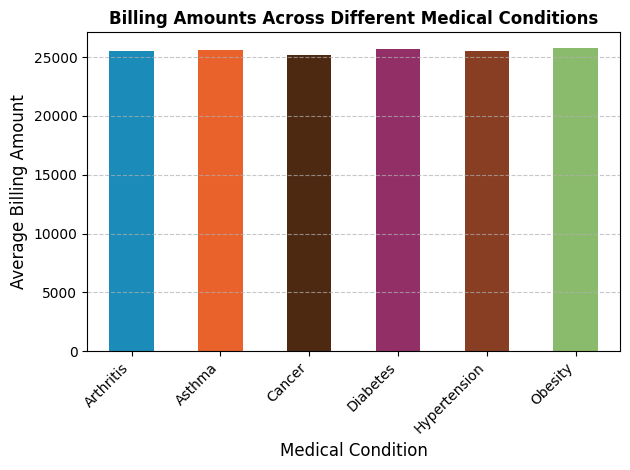

In [170]:
billing_by_condition.plot.bar(x='Medical Condition', y='Average Billing Amount', legend=False, color=COLORS)
plt.title('Billing Amounts Across Different Medical Conditions', fontweight='bold')
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Average Billing Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The average cost for obesity is higher, followed by diabetes, asthma, arthritis, hypertension, and lastly cancer. 

#### B. Insurance provider impact

In [171]:
# Analyze how different insurers correlate with treatment costs

insurance_billing = data_df.groupby('Insurance Provider')['Billing Amount'].mean().round(2).reset_index()
insurance_billing.columns = ['Insurance Provider', 'Average Billing Amount']
insurance_billing


,Insurance Provider,Average Billing Amount
0,Aetna,25553.02
1,Blue Cross,25604.85
2,Cigna,25528.22
3,Medicare,25630.16
4,Unitedhealthcare,25415.44


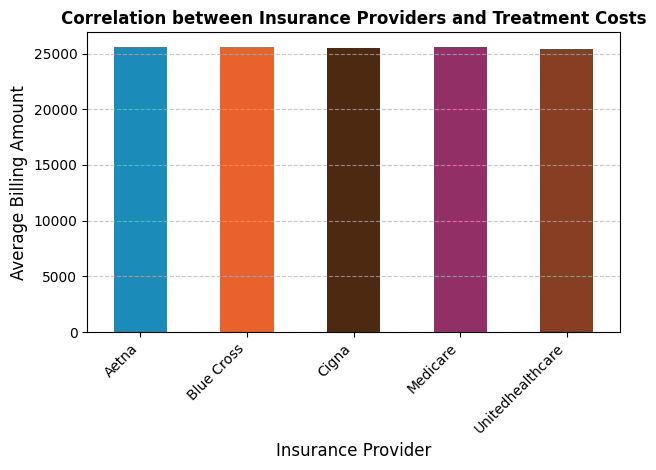

In [172]:
insurance_billing.plot.bar(x='Insurance Provider', y='Average Billing Amount', legend=False, color=COLORS)
plt.title('Correlation between Insurance Providers and Treatment Costs', fontweight='bold')
plt.xlabel('Insurance Provider', fontsize=12)
plt.ylabel('Average Billing Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Insurance providers pay nearly the same average amounts, with medicare paying slightly higher, then Blue Cross. 

##### C. Age-cost relationships

In [173]:
# Examine the relationship between medical costs and age

age_and_costs = data_df.groupby('Age Group', observed=True)['Billing Amount'].mean().round(2).reset_index()
age_and_costs


,Age Group,Billing Amount
0,10-19,26322.00
1,20-39,25555.83
2,40-59,25496.04
3,60-79,25585.05
4,80-89,25286.35


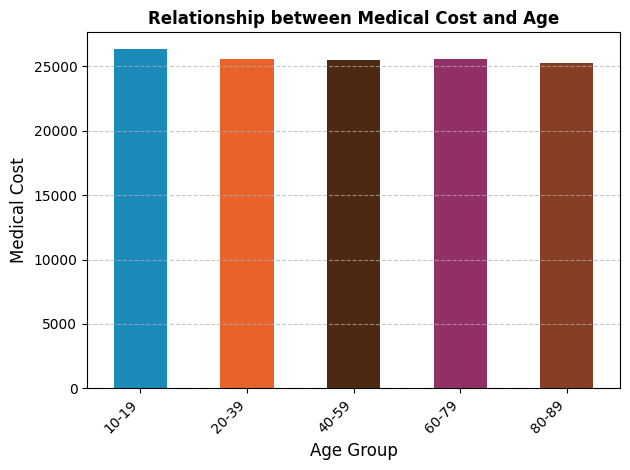

In [174]:
age_and_costs.plot.bar(x='Age Group', y='Billing Amount', legend=False, color=COLORS)
plt.title('Relationship between Medical Cost and Age', fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Medical Cost', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Patients between the ages of 10 and 19 pay slightly more for medications than their older counterparts.

#### C. Admission type costs

In [175]:
# Relationship between admission type and billing amount

admission_type_costs = data_df.groupby('Admission Type', observed=True)['Billing Amount'].mean().round(2).reset_index()
admission_type_costs

,Admission Type,Billing Amount
0,Elective,25614.52
1,Emergency,25506.60
2,Urgent,25516.69


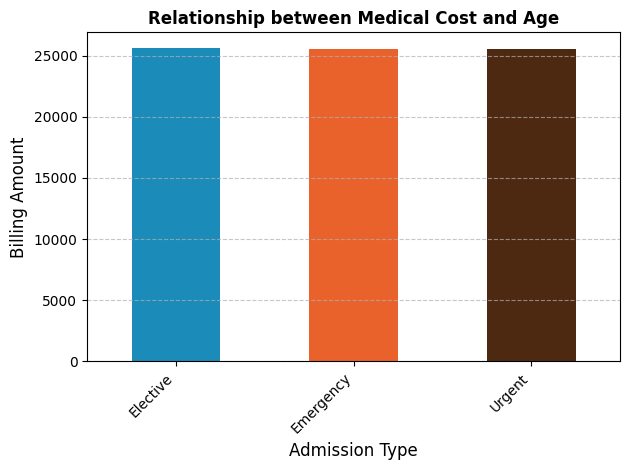

In [176]:
admission_type_costs.plot.bar(x='Admission Type', y='Billing Amount', legend=False, color=COLORS)
plt.title('Relationship between Medical Cost and Age', fontweight='bold')
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Billing Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The average costs of all types of admission are nearly the same, with elective costing a little bit more, followed by urgent, and lastly emergency.